In [2]:
#!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

^C


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                  
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results



In [ ]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [ ]:
def draw_styled_landmarks(image, results):   
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
cap = cv2.VideoCapture(0)
holistic = mp_holistic.Holistic
with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)   
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1722566513.328451    4669 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1722566513.329508   24802 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.9-0ubuntu0.1), renderer: Mesa Intel(R) UHD Graphics (TGL GT1)
W0000 00:00:1722566513.410425   24789 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722566513.432528   24788 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722566513.433341   24788 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722566513.434168   24792 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W00

In [ ]:
len(results.left_hand_landmarks.landmark)

NameError: name 'results' is not defined

In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
draw_landmarks(frame, results)

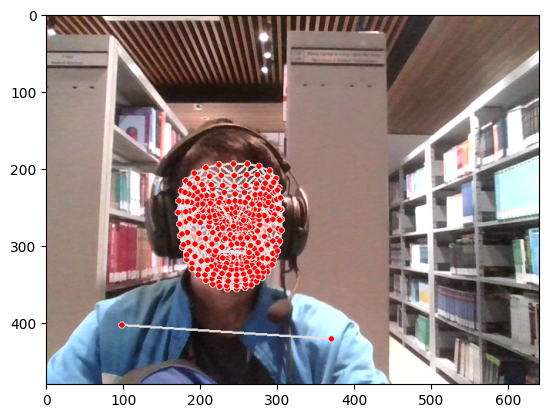

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
len(results.right_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
len(results.face_landmarks.landmark)

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
pose

[array([ 0.38029459,  0.57362074, -1.01559734,  0.99996567]),
 array([ 0.40376192,  0.51002783, -0.95912915,  0.99993259]),
 array([ 0.41854459,  0.51290351, -0.95897722,  0.99993449]),
 array([ 0.43434244,  0.51658785, -0.95911849,  0.99991882]),
 array([ 0.3502261 ,  0.50906843, -0.96074229,  0.99994195]),
 array([ 0.33301336,  0.51072305, -0.95998204,  0.99994814]),
 array([ 0.31757465,  0.51423544, -0.96020001,  0.99994391]),
 array([ 0.46030253,  0.5560022 , -0.56441355,  0.9999274 ]),
 array([ 0.29073575,  0.55363238, -0.55935454,  0.99996573]),
 array([ 0.41193289,  0.64573014, -0.86567509,  0.99996728]),
 array([ 0.34484416,  0.64079875, -0.86442375,  0.99997956]),
 array([ 0.5784393 ,  0.87834734, -0.29331201,  0.99900079]),
 array([ 0.15436088,  0.83961809, -0.34703287,  0.99932384]),
 array([ 0.72541261,  1.21474516, -0.26410085,  0.18579553]),
 array([-0.0154497 ,  1.09434938, -0.46693459,  0.44189954]),
 array([ 0.74424064,  1.50982833, -0.63445294,  0.03195342]),
 array([

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

array([ 0.38029459,  0.57362074, -1.01559734, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
len(result_test)

1662

In [ ]:
468*3+33*4+21*3+21*3

1662

# Setup Folders


In [ ]:
DATA_PATH = os.path.join('MP_Data') 
actions = np.array(["Bon La","Ban Yeu Toi","Xin chao","Cam on","Xin loi","Ruc Ro","Toi yeu ban","Thay"])
# Video
no_sequences = 50

# Frame
sequence_length = 50

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.2, min_tracking_confidence=0.2) as holistic:
    

    for action in actions:

        for sequence in range(no_sequences):

            for frame_num in range(sequence_length):


                ret, frame = cap.read()


                image, results = mediapipe_detection(frame, holistic)


                draw_styled_landmarks(image, results)

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,300), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000) # Setting
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1724576563.529072   60150 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1724576563.529825   69385 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.9-0ubuntu0.1), renderer: Mesa Intel(R) UHD Graphics (TGL GT1)
W0000 00:00:1724576563.578580   69373 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724576563.589116   69380 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724576563.589667   69371 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724576563.589666   69375 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W00

In [ ]:
# cap = cv2.VideoCapture("/home/chucky/PycharmProjects/pythonProject/landmark/xinchao.mp4")
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     frame_num = 0
#     while cap.isOpened():
# 
#         # Read feed
#         ret, frame = cap.read()
#         if not ret:
#             break
# 
#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
# 
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
# 
#         # Display the frame
#         cv2.imshow('OpenCV Feed', image)
# 
#         # Export keypoints
#         keypoints = extract_keypoints(results)
#         npy_path = os.path.join("MP_Data/Xin chao", actions[0], str(frame_num))  # Assuming single action, modify as needed
#         np.save(npy_path, keypoints)
# 
#         frame_num += 1
# 
#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

{'Bon La': 0,
 'Ban Yeu Toi': 1,
 'Xin chao': 2,
 'Cam on': 3,
 'Xin loi': 4,
 'Ruc Ro': 5,
 'Toi yeu ban': 6,
 'Thay': 7}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape

(400, 50, 1662)

In [ ]:
np.array(labels).shape

(400,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(400, 50, 1662)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [ ]:
y_test.shape

(20, 8)

In [ ]:
X_test.shape

(20, 50, 1662)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(50,1662)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

/home/chucky/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
res = [.7, 0.8, 0.9]

In [ ]:
actions[np.argmax(res)]

'Xin chao'

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate = 1e-6), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - categorical_accuracy: 0.8111 - loss: 0.6025
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - categorical_accuracy: 0.8401 - loss: 0.5958
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - categorical_accuracy: 0.8232 - loss: 0.6287
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - categorical_accuracy: 0.7976 - loss: 0.6337
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - categorical_accuracy: 0.8435 - loss: 0.5983
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - categorical_accuracy: 0.8341 - loss: 0.6063
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - categorical_accuracy: 0.8560 - loss: 0.5990
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - categorical_accuracy: 0.8321 - loss: 0.6375
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - categorical_accuracy: 0.8095 - loss: 0.6596
Epoch 10/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.8282 - loss: 0.6389
Epoch 11/500
12/12 

In [ ]:
with open('model_summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,791,761 (6.84 MB)

 Trainable params: 597,125 (2.28 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 1,194,252 (4.56 MB)

In [ ]:
res = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


In [ ]:
actions[np.argmax(res[2])]

'Xin loi'

In [ ]:
actions.shape[0]

5

In [ ]:
actions[np.argmax(y_test[2])]

'Xin loi'

In [ ]:
model.save('50frame2.h5')    
model.save_weights('50frame2.weights.h5')

In [ ]:
del model

In [ ]:
model.load_weights('50frame.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
confusion_matrix(ytrue, yhat)

array([[2, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 4]])

In [ ]:
accuracy_score(ytrue, yhat)

1.0

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245),(232,231,245),(122,117,231)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1800x1800 with 0 Axes>

In [ ]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [ ]:
len(sequence)

TypeError: object of type 'int' has no len()

In [ ]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [ ]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [ ]:
res

[0.7, 0.8, 0.9]

In [ ]:
from gtts import gTTS
from playsound import playsound
import os
import time
sequence = []
sentence = []
prediction = []
threshold = 0.8
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.2, min_tracking_confidence=0.2) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        if not ret:
            break


        image, results = mediapipe_detection(frame, holistic)
        print(results)
        


        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        
        
        sequence = sequence[-50:]
        
        if len(sequence) == 50:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])
            prediction.append([np.argmax(res)])

            if np.unique(prediction[-20:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
    
                if len(sentence) > 5:
                    sentence = sentence[-5:]
    
                # Display probabilities
                # y_offset = 100
                # for i, prob in enumerate(res):
                #     cv2.pu|tText(image, f'{actions[i]}: {prob:.2f}', (10, y_offset), 
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2, cv2.LINE_AA)
                #     y_offset += 30
                image = prob_viz(res, actions, image, colors)
                # if not results.left_hand_landmarks and not results.right_hand_landmarks:
                #     if sentence:
                #         tts = gTTS(text=' '.join(sentence), lang='vi')
                #         tts.save("sentence.mp3")
                #         playsound("sentence.mp3")
                #         os.remove("sentence.mp3")
                #         sentence = []  
                #         time.sleep(200)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Application', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1722561036.712867    4669 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1722561036.713487    4848 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.9-0ubuntu0.1), renderer: Mesa Intel(R) UHD Graphics (TGL GT1)
W0000 00:00:1722561036.764292    4836 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722561036.776831    4841 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722561036.777372    4838 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722561036.777499    4845 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W00

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
import threading
from gtts import gTTS
from playsound import playsound
import os
import time
sequence = []
sentence = []
prediction = []
threshold = 0.8
cap = cv2.VideoCapture(0)
frame = None
lock = threading.Lock()


def capture_frames():
    global frame
    while cap.isOpened():
        ret, captured_frame = cap.read()
        if not ret:
            break
        with lock:
            frame = captured_frame

def process_frames():
    global frame, sequence, sentence, prediction
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            with lock:
                if frame is not None:
                    image, results = mediapipe_detection(frame, holistic)

            if frame is not None:
                keypoints = extract_keypoints(results)
                sequence.append(keypoints)
                sequence = sequence[-50:]

                if len(sequence) == 50:
                    res = model.predict(np.expand_dims(sequence, axis=0))[0]
                    print(res)
                    print(actions[np.argmax(res)])
                    prediction.append(np.argmax(res))

                    if np.unique(prediction[-10:])[0] == np.argmax(res):
                        if res[np.argmax(res)] > threshold:
                            if len(sentence) > 0:
                                if actions[np.argmax(res)] != sentence[-1]:
                                    sentence.append(actions[np.argmax(res)])
                            else:
                                sentence.append(actions[np.argmax(res)])

                        if len(sentence) > 5:
                            sentence = sentence[-5:]
                        # Display probabilities
                        # y_offset = 100
                        # for i, prob in enumerate(res):
                        #     cv2.pu|tText(image, f'{actions[i]}: {prob:.2f}', (10, y_offset), 
                        #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2, cv2.LINE_AA)
                        #     y_offset += 30
                        # image = prob_viz(res, actions, image, colors)

                        # if not results.left_hand_landmarks and not results.right_hand_landmarks: 
                        #     if sentence:
                        #         tts = gTTS(text=' '.join(sentence), lang='vi')
                        #         tts.save("sentence.mp3")
                        #         playsound("sentence.mp3")
                        #         os.remove("sentence.mp3")
                        #         sentence = []
                        #         time.sleep(2000)

                # cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
                # cv2.putText(image, ' '.join(sentence), (3, 30),
                #         cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
capture_thread = threading.Thread(target=capture_frames)
process_thread = threading.Thread(target=process_frames)
capture_thread.start()
process_thread.start()


while cap.isOpened():
    with lock:
        if frame is not None:
            image = frame.copy()
            if len(sequence) == 50:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                for num, prob in enumerate(res):
                    cv2.rectangle(image, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
                    cv2.putText(image, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow('Application', image)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1722566267.715301   20464 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1722566267.716896   20479 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.9-0ubuntu0.1), renderer: Mesa Intel(R) UHD Graphics (TGL GT1)
W0000 00:00:1722566267.812280   20470 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722566267.840051   20467 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722566267.841443   20471 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722566267.841451   20466 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[0.04563794 0.02710909 0.00331298 0.00729827 0.9166416 ]
Xin loi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.0394651  0.02314562 0.00380302 0.00716016 0.92642605]
Xin loi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.03705433 0.02363796 0.00513383 0.00800629 0.92616767]
Xin loi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Xin loi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.04316109 0.03972546 0.01171015 0.01584504 0.88955826]
Xin loi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0.05248718 0.05732035 0.01723841 0.02342327 0.8495308 ]
Xin loi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0.06482701 0.07559759 0.02264559 0.03321928 0.8037105 ]
Xi

In [ ]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'qcap' is not defined

In [ ]:
cap = cv2.VideoCapture(0)  # Try with index 1 or 2 if 0 doesn't work


In [ ]:
sentence

[]

In [ ]:
res = np.expand_dims(sequence, axis=0).shape

In [ ]:
res

(1, 0)

In [ ]:
example_input = np.random.rand(None,30, 1662).astype(np.float32)
model.build(example_input.shape)

TypeError: 'NoneType' object cannot be interpreted as an integer

In [ ]:
from tensorflow.keras.models import load_model
# Load the pre-trained model
model = load_model('action2.h5')
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
sample_input = np.zeros((1, 30, 1662))

In [ ]:
model(res)

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: 1 (of type <class 'int'>)

In [ ]:
inputs = model.input

ValueError: The layer sequential_7 has never been called and thus has no defined input.

In [18]:
import cv2
import mediapipe as mp
import numpy as np

# Constants for drawing connections
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

# Constants for ignored landmarks
IGNORED_BODY_LANDMARKS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20, 21, 22]


class PoseService:
    def __init__(self):
        self.model = None
        self.is_first_frame = True
        self.on_results_callbacks = []

    def on_results(self, callback):
        self.on_results_callbacks.append(callback)

    def load(self):
        self.model = mp_holistic.Holistic(
            static_image_mode=False,
            model_complexity=1,
            enable_segmentation=False,
            refine_face_landmarks=True
        )

    def predict(self, image):
        if self.model is None:
            self.load()

        results = self.model.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        for callback in self.on_results_callbacks:
            callback(results)

    def draw_body(self, landmarks, image):
        filtered_landmarks = [landmark for i, landmark in enumerate(landmarks) if i not in IGNORED_BODY_LANDMARKS]

        mp_drawing.draw_landmarks(image, filtered_landmarks, mp_holistic.POSE_CONNECTIONS)

    def draw_hand(self, landmarks, image, line_color, dot_color, dot_fill_color):
        mp_drawing.draw_landmarks(
            image,
            landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=line_color, thickness=2),
            mp_drawing.DrawingSpec(color=dot_color, thickness=2, circle_radius=2)
        )

    def draw_face(self, landmarks, image):
        mp_drawing.draw_landmarks(image, landmarks, mp_holistic.FACEMESH_TESSELATION,
                                  mp_drawing.DrawingSpec(color=(192, 192, 192), thickness=1, circle_radius=1))

    def draw(self, results, image):
        if results.pose_landmarks:
            self.draw_body(results.pose_landmarks, image)

        if results.left_hand_landmarks:
            self.draw_hand(results.left_hand_landmarks, image, (204, 0, 0), (255, 0, 0), (0, 255, 0))

        if results.right_hand_landmarks:
            self.draw_hand(results.right_hand_landmarks, image, (0, 204, 0), (0, 255, 0), (255, 0, 0))

        if results.face_landmarks:
            self.draw_face(results.face_landmarks, image)

    def normalize_holistic(self, pose_landmarks, image_width, image_height, normalized=True):
        landmarks = [(lmk.x * image_width, lmk.y * image_height, lmk.z * image_width) for lmk in pose_landmarks.landmark]

        if normalized:
            left_shoulder = landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value]
            right_shoulder = landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value]
            scale = np.sqrt((right_shoulder[0] - left_shoulder[0]) ** 2 +
                            (right_shoulder[1] - left_shoulder[1]) ** 2 +
                            (right_shoulder[2] - left_shoulder[2]) ** 2)

            dx = (left_shoulder[0] + right_shoulder[0]) / 2
            dy = (left_shoulder[1] + right_shoulder[1]) / 2
            dz = (left_shoulder[2] + right_shoulder[2]) / 2

            landmarks = [(0 if x == 0 else (x - dx) / scale,
                          0 if y == 0 else (y - dy) / scale,
                          0 if z == 0 else (z - dz) / scale) for x, y, z in landmarks]

        return landmarks


def main():
    cap = cv2.VideoCapture(0)
    pose_service = PoseService()
    pose_service.load()

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        pose_service.predict(frame)

        def draw_callback(results):
            pose_service.draw(results, frame)

        pose_service.on_results(draw_callback)
        cv2.imshow('MediaPipe Holistic', frame)

        if cv2.waitKey(5) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()



In [19]:
main()

[ WARN:0@256.120] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@256.120] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
I0000 00:00:1725354380.395060   34092 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1725354380.396351   46266 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.9-0ubuntu0.1), renderer: Mesa Intel(R) UHD Graphics (TGL GT1)


W0000 00:00:1725354380.457127   46258 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725354380.473568   46252 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725354380.474232   46256 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725354380.474325   46259 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725354380.474770   46258 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725354380.487157   46255 inference_feedback_manager.cc:114] Feedback manager 

In [20]:
import cv2

cap = cv2.VideoCapture(0)  # Try different indexes if 0 doesn't work

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Cannot open camera
Can't receive frame (stream end?). Exiting ...


[ WARN:0@260.135] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@260.136] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


: 